In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using Plots; gr();
using Printf

  Activating project at `~/Coding/julia/FUSE`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


In [6]:
# Load TRANSP data at 2.91 s
file_0 = joinpath(dirname(dirname(dirname(abspath(@__FILE__)))),"QED", "sample", "ods_163303Z29-2910.json")
dd = IMAS.json2imas(file_0; verbose=false);
actor=FUSE.QEDcurrentActor(dd);

1

2

3

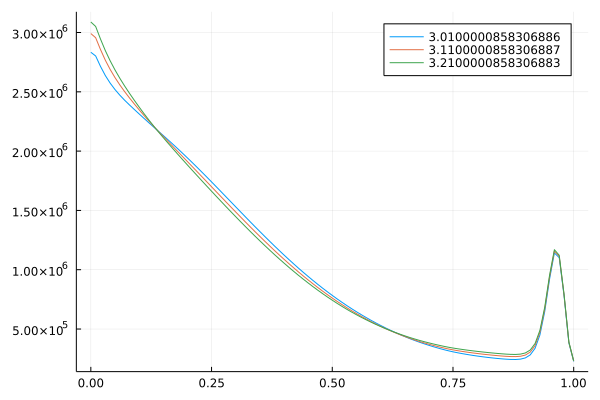

In [7]:
p=plot()
for k in 1:3
    display(k)
    FUSE.step(actor,0.1,100,resume=true)
    FUSE.finalize(actor);
    dd.global_time=dd.equilibrium.time[end]
    plot!(p,dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm, dd.equilibrium.time_slice[].profiles_1d.j_tor,label=@ddtime(dd.equilibrium.time))
end
display(p)

1

2

3

4

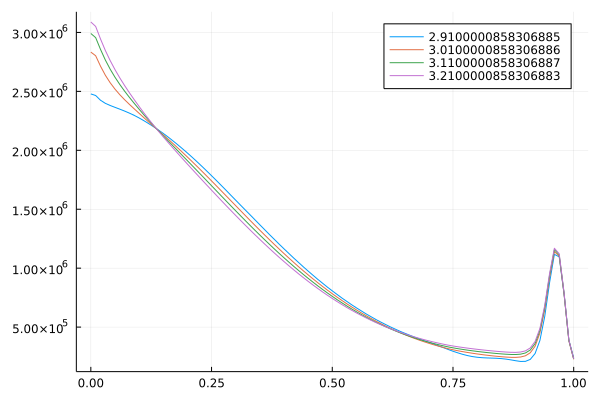

In [9]:
p=plot()
for k in 1:length(dd.equilibrium.time_slice)
    display(k)
    plot!(p,dd.equilibrium.time_slice[k].profiles_1d.rho_tor_norm, dd.equilibrium.time_slice[k].profiles_1d.j_tor,label=dd.equilibrium.time[k])
end
display(p)